In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zipcode,poname,created_date,objectid,globalid,created_user,last_edited_date,last_edited_user,geometry
0,37015,ASHLAND CITY,NaN,21,{2AB8F204-63EE-49A4-A806-8E1DAE1C32AA},NaN,NaN,NaN,"MULTIPOLYGON (((-86.88867 36.28013, -86.88867 ..."
1,37143,PEGRAM,NaN,23,{B142BE7A-6E4F-4325-95C5-A1C980D46F37},NaN,NaN,NaN,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
2,37072,GOODLETTSVILLE,NaN,46,{FD866D5C-A196-4C6E-9CFF-A04FD08B1657},NaN,NaN,NaN,"MULTIPOLYGON (((-86.76191 36.39867, -86.76200 ..."
3,37189,WHITES CREEK,NaN,50,{AD8029C0-DF92-4103-B4DF-A67EF4F502E1},NaN,NaN,NaN,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
4,37015,ASHLAND CITY,NaN,20,{49D81E1C-5F08-414E-AED7-8C8F9714DD83},NaN,NaN,NaN,"MULTIPOLYGON (((-86.92773 36.28074, -86.92769 ..."


In [3]:
zipcodes.geometry.to_crs('epsg:4326')
print(zipcodes.crs)

epsg:4326


C:\Users\fozey\anaconda\envs\geospatial_ds6\lib\site-packages\geopandas\plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


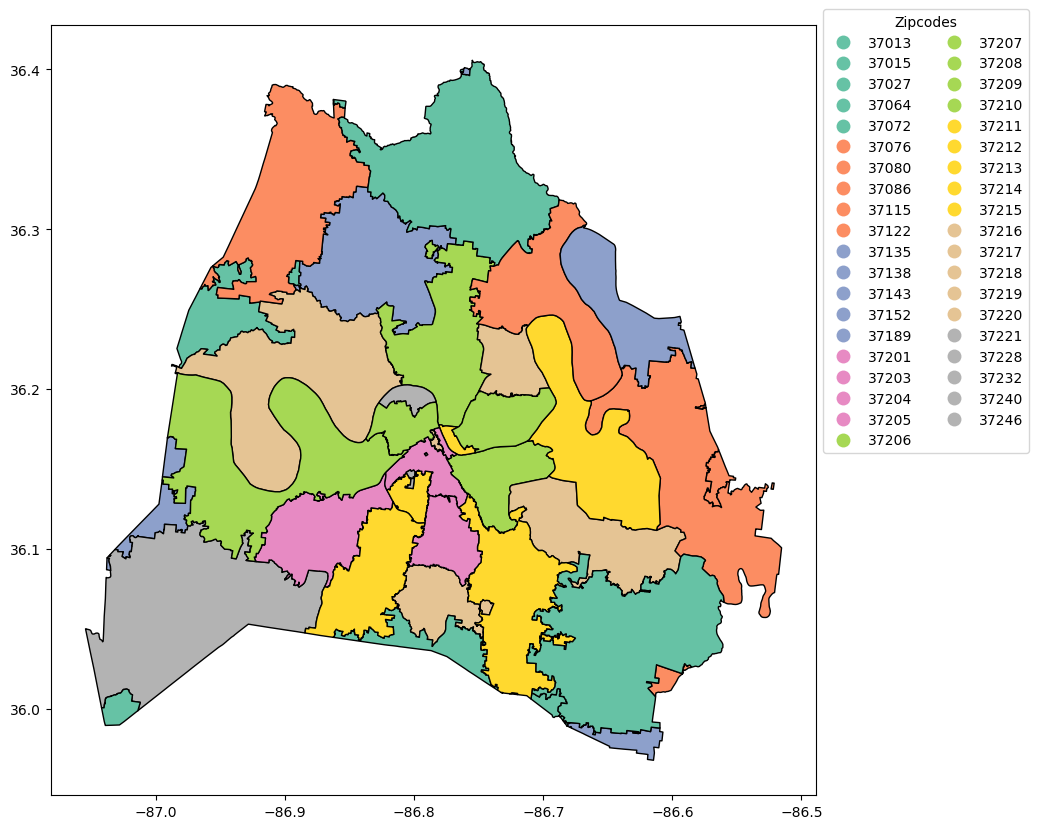

In [4]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zipcode', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [5]:
scooters = pd.read_csv('../data/scootersgeo_data.csv')
scooters.head(3)

,latitude,longitude,sumdid,geometry
0,36.1526,-86.7841,Poweredcf283f9e-5df3-5339-8a3e-21a35f6167cb,"(-86.7841, 36.1526)"
1,36.1727,-86.7800,Powered5e931f28-28f3-5404-9395-52e810193e72,"(-86.78, 36.1727)"
2,36.1630,-86.7760,Powered3dd96c78-6571-5111-8973-0a3aa18ee9bf,"(-86.776, 36.163)"


In [6]:
scooters['geometry'] = scooters.apply(lambda x: Point((float(x.longitude), 
                                                         float(x.latitude))), 
                                        axis=1)
scooters.head()

C:\Users\fozey\anaconda\envs\geospatial_ds6\lib\site-packages\pandas\core\dtypes\cast.py:126: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,latitude,longitude,sumdid,geometry
0,36.1526,-86.7841,Poweredcf283f9e-5df3-5339-8a3e-21a35f6167cb,POINT (-86.7841 36.1526)
1,36.1727,-86.7800,Powered5e931f28-28f3-5404-9395-52e810193e72,POINT (-86.78 36.1727)
2,36.1630,-86.7760,Powered3dd96c78-6571-5111-8973-0a3aa18ee9bf,POINT (-86.776 36.163)
3,36.1549,-86.7874,Powered2158b1de-2edc-5648-b18d-d3c87f044bcc,POINT (-86.7874 36.1549)
4,36.1202,-86.7536,Powered22b065ba-265e-582b-8a2d-d9863844455a,POINT (-86.7536 36.1202)


In [7]:
# crs zipcodes = crs scooters = epsg:4326

In [8]:
zipcodes.geometry.to_crs('epsg:4326')
print(zipcodes.crs)

epsg:4326


In [9]:
scootersgeo = gpd.GeoDataFrame(scooters, 
                           crs = zipcodes.crs, 
                           geometry = scooters['geometry'])

In [10]:
# joining zipcodes with scooters

In [11]:
scooters_zip = gpd.sjoin(scootersgeo, zipcodes, op = 'within')

C:\Users\fozey\anaconda\envs\geospatial_ds6\lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [12]:
scooters_zip.head(3)

,latitude,longitude,sumdid,geometry,index_right,zipcode,poname,created_date,objectid,globalid,created_user,last_edited_date,last_edited_user
0,36.1526,-86.7841,Poweredcf283f9e-5df3-5339-8a3e-21a35f6167cb,POINT (-86.78410 36.15260),38,37203,NASHVILLE,NaN,33,{0C5DE6D7-6108-445E-8738-5FE7E08E3F6B},NaN,NaN,NaN
3,36.1549,-86.7874,Powered2158b1de-2edc-5648-b18d-d3c87f044bcc,POINT (-86.78740 36.15490),38,37203,NASHVILLE,NaN,33,{0C5DE6D7-6108-445E-8738-5FE7E08E3F6B},NaN,NaN,NaN
14,36.1493,-86.7965,Powered3a11f4b4-542a-529c-971d-5e494ab77ea8,POINT (-86.79650 36.14930),38,37203,NASHVILLE,NaN,33,{0C5DE6D7-6108-445E-8738-5FE7E08E3F6B},NaN,NaN,NaN


In [13]:
scooters_zip.sumdid.value_counts()

sumdid
Powered384        941
Powered511        941
Powered618        941
Powered629        941
Powered516        941
                 ... 
PoweredNMYWG        1
Powered6YANS        1
Powered3441411      1
PoweredI5M6F        1
Powered8019965      1
Name: count, Length: 6084, dtype: int64

In [14]:
#the distrubition of number of scooters in d/t area.

In [15]:
scooters_pt = scooters_zip.loc[scooters_zip['poname'] == 'NASHVILLE']
scooters_pt.head(2)

,latitude,longitude,sumdid,geometry,index_right,zipcode,poname,created_date,objectid,globalid,created_user,last_edited_date,last_edited_user
0,36.1526,-86.7841,Poweredcf283f9e-5df3-5339-8a3e-21a35f6167cb,POINT (-86.78410 36.15260),38,37203,NASHVILLE,NaN,33,{0C5DE6D7-6108-445E-8738-5FE7E08E3F6B},NaN,NaN,NaN
3,36.1549,-86.7874,Powered2158b1de-2edc-5648-b18d-d3c87f044bcc,POINT (-86.78740 36.15490),38,37203,NASHVILLE,NaN,33,{0C5DE6D7-6108-445E-8738-5FE7E08E3F6B},NaN,NaN,NaN


In [16]:
# select specific columns

In [17]:
scooters_pt1 = scooters_pt[['latitude', 'longitude','sumdid','geometry','zipcode','poname']]
scooters_pt1.head()

,latitude,longitude,sumdid,geometry,zipcode,poname
0,36.1526,-86.7841,Poweredcf283f9e-5df3-5339-8a3e-21a35f6167cb,POINT (-86.78410 36.15260),37203,NASHVILLE
3,36.1549,-86.7874,Powered2158b1de-2edc-5648-b18d-d3c87f044bcc,POINT (-86.78740 36.15490),37203,NASHVILLE
14,36.1493,-86.7965,Powered3a11f4b4-542a-529c-971d-5e494ab77ea8,POINT (-86.79650 36.14930),37203,NASHVILLE
28,36.1518,-86.8032,Poweredc99be157-6777-5917-8007-8b6220a1f339,POINT (-86.80320 36.15180),37203,NASHVILLE
34,36.1609,-86.7810,Powered25697b88-161b-5a44-9c3b-c489a031673e,POINT (-86.78100 36.16090),37203,NASHVILLE


In [19]:
zipcodes = zipcodes[['zipcode', 'poname', 'geometry']]
zipcodes.head()

,zipcode,poname,geometry
0,37015,ASHLAND CITY,"MULTIPOLYGON (((-86.88867 36.28013, -86.88867 ..."
1,37143,PEGRAM,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
2,37072,GOODLETTSVILLE,"MULTIPOLYGON (((-86.76191 36.39867, -86.76200 ..."
3,37189,WHITES CREEK,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
4,37015,ASHLAND CITY,"MULTIPOLYGON (((-86.92773 36.28074, -86.92769 ..."


In [20]:
polygon_in_nashville = zipcodes.loc[zipcodes['poname'] == 'NASHVILLE']
polygon_in_nashville.head(2)

,zipcode,poname,geometry
8,37240,NASHVILLE,"MULTIPOLYGON (((-86.80304 36.14960, -86.80233 ..."
9,37218,NASHVILLE,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."


In [21]:
# plot Nashville

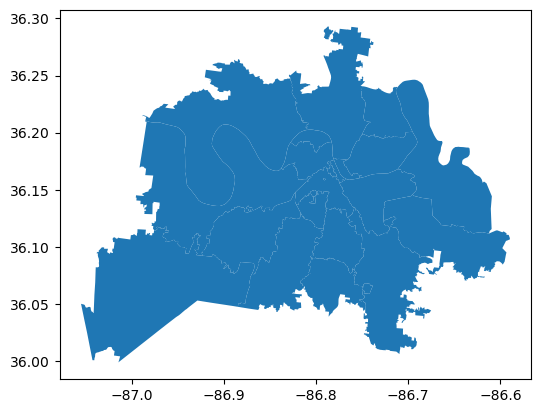

In [22]:
polygon_in_nashville.plot();

In [23]:
# plot scooters_pts1 and polygon_in_nashville togethers

C:\Users\fozey\anaconda\envs\geospatial_ds6\lib\site-packages\geopandas\plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


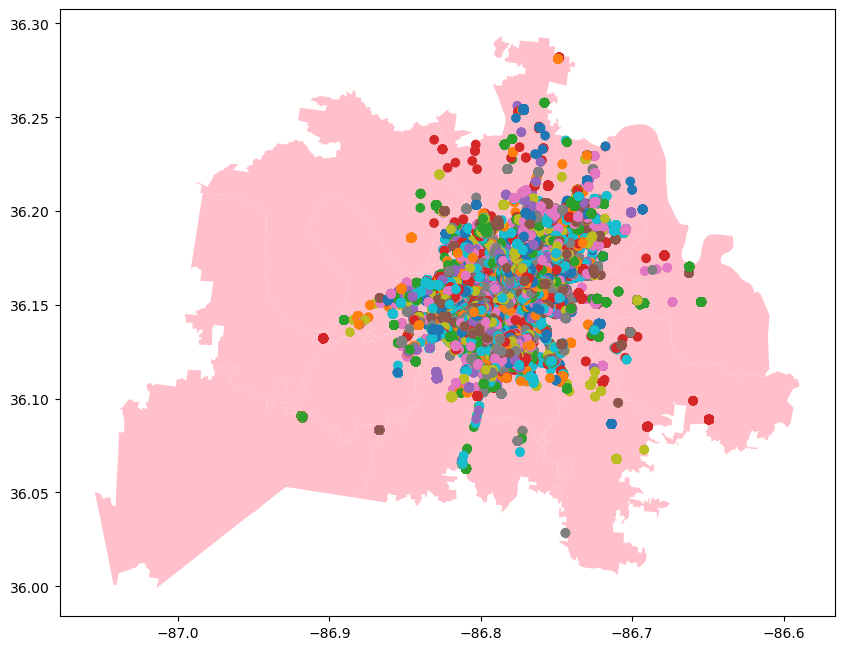

In [27]:
#fig, ax = matplotlib.subplots()
ax = polygon_in_nashville.plot(figsize = (15, 25), color = 'pink')
scooters_pt1.plot( ax = ax, column = 'sumdid');
plt.show();

In [25]:
polygon_in_nashville.geometry.centroid

C:\Users\fozey\AppData\Local\Temp\ipykernel_6768\4205269912.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon_in_nashville.geometry.centroid


8     POINT (-86.80250 36.14688)
9     POINT (-86.89039 36.20505)
14    POINT (-86.73347 36.14429)
15    POINT (-86.77677 36.23245)
16    POINT (-86.97531 36.06283)
17    POINT (-86.78317 36.16682)
18    POINT (-86.80400 36.19479)
19    POINT (-86.76851 36.16713)
21    POINT (-86.79086 36.15924)
22    POINT (-86.78161 36.06685)
23    POINT (-86.66093 36.10779)
27    POINT (-86.72635 36.21605)
28    POINT (-86.66271 36.16744)
30    POINT (-86.87327 36.11084)
34    POINT (-86.80157 36.13335)
37    POINT (-86.73098 36.18090)
38    POINT (-86.78898 36.14857)
40    POINT (-86.77702 36.16557)
42    POINT (-86.72308 36.06711)
44    POINT (-86.78726 36.28724)
47    POINT (-86.80236 36.14071)
50    POINT (-86.91816 36.15605)
52    POINT (-86.77467 36.10566)
53    POINT (-86.83435 36.08232)
54    POINT (-86.80805 36.17736)
dtype: geometry

In [28]:
#find the center of the larger (more southern) polygon and look at it
center = polygon_in_nashville.geometry.centroid[27]
print(center)

POINT (-86.72634557210618 36.21605012332707)


C:\Users\fozey\AppData\Local\Temp\ipykernel_6768\269067483.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon_in_nashville.geometry.centroid[27]


In [29]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.21605012332707, -86.72634557210618]


In [ ]:
#draw our zip code area: 37207
map_nashville= folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon_in_nashville).add_to(map_nashville)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in scooters_pt1.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['geometry'])
    icon=folium.Icon(color="red",icon="scooter", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_nashville)
map_nashville.save('../data/map_nashville.html')

#display our map
map_nashville

In [ ]:
folium.Map?

In [ ]:
cluster_map_nashville = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_nashville)

folium.GeoJson(polygon_in_nashville).add_to(cluster_map_nashviile)

# inside the loop add each marker to the cluster
for row_index, row_values in scooters_pt1.iterrows():
    loc = [row_values['latitude'], row_values['longtude']]
    pop = str(row_values['sumdid'])
    icon=folium.Icon(color="blue",icon="scooters", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_nashville.save('../data/clusternashville.html')

cluster_map_nashville 